In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import trompy as tp

In [ ]:
DATAFOLDER = Path("..\\data")
FIGSFOLDER = Path("..\\figures")
FIGSFOLDER = Path("C:\\Users\\jmc010\\Dropbox\\Publications in Progress\\IPP Giulia paper\\figs")

save_figs = True

def tweak_df_in_kcal(df):

    df_nr = (df
             .query("diet == 'NR'")
             .map(lambda x: x * 3.4 / 2 if isinstance(x, (int, float)) else x)
    )

    df_pr = (df
             .query("diet == 'PR'")
             .map(lambda x: x * 4 / 2 if isinstance(x, (int, float)) else x)
    )

    return (pd
            .concat([df_nr, df_pr])
            .drop(columns=["cage"])
    )

df = pd.read_csv(DATAFOLDER / "foodintake.csv", sep=";")
df = tweak_df_in_kcal(df)

In [5]:
group_column = 'diet'  # Replace with the actual column name for grouping
x_columns = df.columns.difference([group_column])


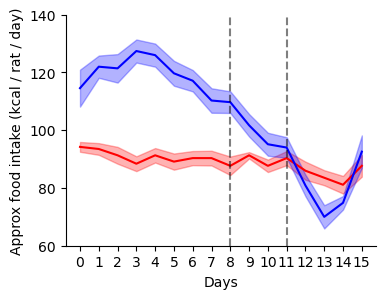

In [6]:
def plot_error(df, x_columns, ax=None, color="red"):

    mean = df[x_columns].mean()
    sem = df[x_columns].sem()
    x = np.arange(len(mean))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    
    ax.plot(mean, color=color)
    ax.fill_between(x, mean - sem, mean + sem, color=color, alpha=0.3)

f, ax = plt.subplots(1, 1, figsize=(4, 3))

df_nr = df.query("diet == 'NR'")
df_pr = df.query("diet == 'PR'")

plot_error(df_nr, x_columns, ax=ax, color="red")
plot_error(df_pr, x_columns, ax=ax, color="blue")

ax.set_xticks(np.arange(len(x_columns)), labels=np.arange(len(x_columns)))
ax.set_xlabel("Days")
ax.set_ylabel("Approx food intake (kcal / rat / day)")

ax.set_ylim(60, 140)
ax.set_yticks(np.arange(60, 141, 20))

ax.axvline(8, color="black", linestyle="--", alpha=0.5)
ax.axvline(11, color="black", linestyle="--", alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

if save_figs:
    f.savefig(FIGSFOLDER / "S2B_kcal_per_day.pdf", dpi=300)

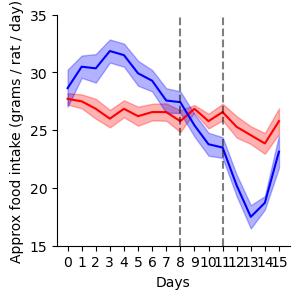

In [7]:
def tweak_df(df):
    
    return (df
            .map(lambda x: x / 2 if isinstance(x, (int, float)) else x)
    )

df = pd.read_csv(DATAFOLDER / "foodintake.csv", sep=";").drop(columns=["cage"])
df = tweak_df(df)

f, ax = plt.subplots(1, 1, figsize=(3, 3))

df_nr = df.query("diet == 'NR'")
df_pr = df.query("diet == 'PR'")

plot_error(df_nr, x_columns, ax=ax, color="red")
plot_error(df_pr, x_columns, ax=ax, color="blue")

ax.set_xticks(np.arange(len(x_columns)), labels=np.arange(len(x_columns)))
ax.set_xlabel("Days")
ax.set_ylabel("Approx food intake (grams / rat / day)")

ax.set_ylim(15, 35)
ax.set_yticks([15, 20, 25, 30, 35])

ax.axvline(8, color="black", linestyle="--", alpha=0.5)
ax.axvline(11, color="black", linestyle="--", alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

if save_figs:
    f.savefig(FIGSFOLDER / "S2A_grams_per_day.pdf", dpi=300)


In [8]:
def tweak_df_in_g_protein(df):

    df_nr = (df
             .query("diet == 'NR'")
             .map(lambda x: x * 0.22 / 2 if isinstance(x, (int, float)) else x)
    )

    df_pr = (df
             .query("diet == 'PR'")
             .map(lambda x: x * 0.04 / 2 if isinstance(x, (int, float)) else x)
    )

    return (pd
            .concat([df_nr, df_pr])
            .drop(columns=["cage"])
    )

df = pd.read_csv(DATAFOLDER / "foodintake.csv", sep=";")
df = tweak_df_in_g_protein(df)

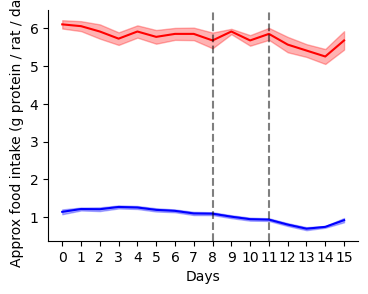

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(4, 3))

df_nr = df.query("diet == 'NR'")
df_pr = df.query("diet == 'PR'")

plot_error(df_nr, x_columns, ax=ax, color="red")
plot_error(df_pr, x_columns, ax=ax, color="blue")

ax.set_xticks(np.arange(len(x_columns)), labels=np.arange(len(x_columns)))
ax.set_xlabel("Days")
ax.set_ylabel("Approx food intake (g protein / rat / day)")

#ax.set_ylim(60, 140)
#ax.set_yticks(np.arange(60, 141, 20))

ax.axvline(8, color="black", linestyle="--", alpha=0.5)
ax.axvline(11, color="black", linestyle="--", alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

if save_figs:
    f.savefig(FIGSFOLDER / "S2C_g_protein_per_day.pdf", dpi=300)

NR rats drink average of 5.09 mL or 0.20 g protein
PR rats drink average of 10.58 mL or 0.42 g protein

Add this amount to each group